In [1]:
import requests

In [2]:
r= requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind/traineddata",stream=True)

with open("/usr/share/tesseract-ocr/4.00/tessdata/ind.traineddata","wb") as file:
  for block in r.iter_content(chunk_size=1024):
    if block:
      file.write(block)

In [3]:
#installing lib req for optical character recognition
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev

#importing IPython to clear output which is not important
from IPython.display import HTML,clear_output
clear_output

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gir1.2-freedesktop
  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common libarchive-dev libblkid-dev
  libcairo-script-interpreter2 libcairo2-dev libdjvulibre-dev libdjvulibre-text libdjvulibre21
  libffi-dev libfftw3-double3 libgdk-pixbuf-2.0-dev libgdk-pixbuf2.0-bin libglib2.0-dev
  libglib2.0-dev-bin libgs9 libgs9-common libice-dev libidn12 libijs-0.35 libjbig2dec0 libjxr-tools
  libjxr0 liblcms2-dev libleptonica-dev liblqr-1-0 liblqr-1-0-dev liblzo2-2
  libmagickcore-6-arch-config libmagickcore-6-headers libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickcore-6.q16-dev libmagickwand-6-headers libmagickwand-6.q16-6
  libmagickwand-6.q16-dev libmount-dev libpixman-1-dev librsvg2-common librsvg2-dev libselinux1-dev
  libsepol-dev libsm-dev libwmf-

<function IPython.core.display.clear_output(wait=False)>

In [4]:
#installing pytesseract and opencv

! pip install pytesseract wand opencv-python
clear_output()

In [7]:
#importing libraries
from PIL import Image
import pytesseract #main lib to extract text from image
import cv2
import numpy as np
from pytesseract import Output
import re


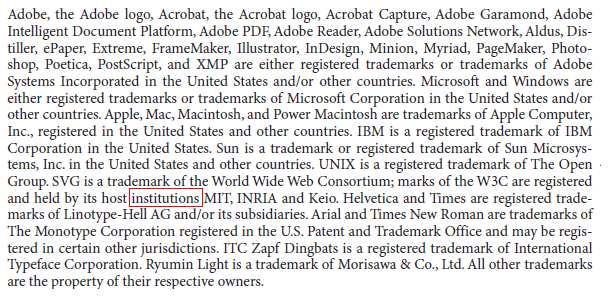

In [16]:
#reading image from url
image = Image.open(requests.get('https://i.stack.imgur.com/t3qWG.png',stream=True).raw)
image.save('sample.png')
image

In [17]:
#now we will extract text from image using tesseract
custom_config = r'-l eng --oem 3 --psm 6'
text=pytesseract.image_to_string(image,config=custom_config)
print(text)

Adobe, the Adobe logo, Acrobat, the Acrobat logo, Acrobat Capture, Adobe Garamond, Adobe
Intelligent Document Platform, Adobe PDF, Adobe Reader, Adobe Solutions Network, Aldus, Dis-
tiller, ePaper, Extreme, FrameMaker, Illustrator, InDesign, Minion, Myriad, PageMaker, Photo-
shop, Poetica, PostScript, and XMP are either registered trademarks or trademarks of Adobe
‘Systems Incorporated in the United States and/or other countries. Microsoft and Windows are
either registered trademarks or trademarks of Microsoft Corporation in the United States and/or
other countries. Apple, Mac, Macintosh, and Power Macintosh are trademarks of Apple Computer,
Inc., registered in the United States and other countries. IBM is a registered trademark of IBM
Corporation in the United States. Sun is a trademark or registered trademark of Sun Microsys-
tems, Inc. in the United States and other countries. UNIX is a registered trademark of The Open
Group. SVG is a trademark of the World Wide Web Consortium; mark

In [18]:
#now we extract text from image and remove irrelevant symbols from characters
try:
  text=pytesseract.image_to_string(image,lang="eng")#its english lang therefore eng
  characters_to_remove="!(@-*>+/,'|\$%^#?`~')"
  new_string =text
  for character in characters_to_remove:
    new_string = new_string.replace(character," ")#replacing the unwanted character with a space
    print(new_string)
except IOError as e:
  print("Error(%s)."% e)


Adobe, the Adobe logo, Acrobat, the Acrobat logo, Acrobat Capture, Adobe Garamond, Adobe
Intelligent Document Platform, Adobe PDF, Adobe Reader, Adobe Solutions Network, Aldus, Dis-
tiller, ePaper, Extreme, FrameMaker, Illustrator, InDesign, Minion, Myriad, PageMaker, Photo-
shop, Poetica, PostScript, and XMP are either registered trademarks or trademarks of Adobe
‘Systems Incorporated in the United States and/or other countries. Microsoft and Windows are
either registered trademarks or trademarks of Microsoft Corporation in the United States and/or
other countries. Apple, Mac, Macintosh, and Power Macintosh are trademarks of Apple Computer,
Inc,, registered in the United States and other countries. IBM is a registered trademark of IBM
Corporation in the United States. Sun is a trademark or registered trademark of Sun Microsys-
tems, Inc. in the United States and other countries. UNIX is a registered trademark of The Open
Group. SVG is a trademark of the World Wide Web Consortium; mark

In [24]:
#now we will perform opencv operation to get the text from complex images

image = cv2.imread('sample.png')

In [25]:
#we convert img to grayscale bcz the img is less complex as we have to process only 0 and 1s

def get_grayscale(image):
  return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)#cv2.cvtColor()is a method used to convert an img form one color to another as there are mor ethan 150 color space conversion in opencv
  gray = get_grayscale(image)
  Image.fromarray(gray)

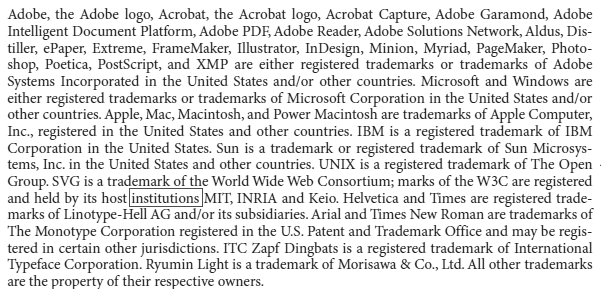

In [29]:
#we now remove the noise form the image
#for it we use blur
def remove_noise(image):
  return cv2.medianBlur(image,5)
gray = get_grayscale(image)
noise = remove_noise(gray)
Image.fromarray(gray)

In [31]:
#thresholding now
def thresholding(image):
  return cv2.threshold(image,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
  thresh = thresholding(gray)
  Image.fromarray(thresh)

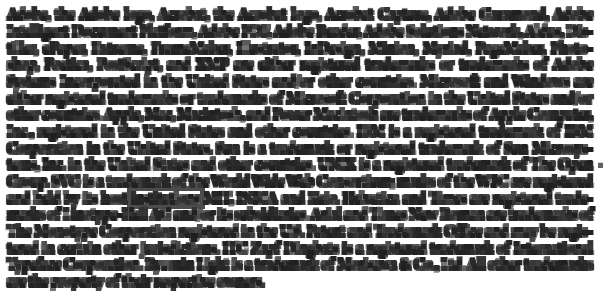

In [39]:
#erosion
def erode(image):
  kernel =np.ones((5,5),np.uint8)
  return cv2.erode(image,kernel,iterations = 1 )
eroded_image = erode(gray)
Image.fromarray(eroded_image)

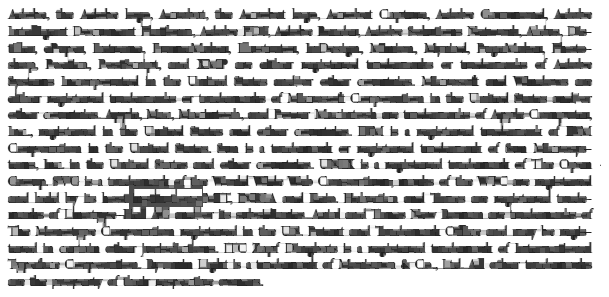

In [41]:
#morphology transformation.. we use it in opening small holes insdie the foreground objects or small white points on the object
def opening(image):
  kernel =np.ones((5,5),np.uint8)
  return cv2.morphologyEx(image,cv2.MORPH_OPEN,kernel)
opening =opening(gray)
Image.fromarray(opening)

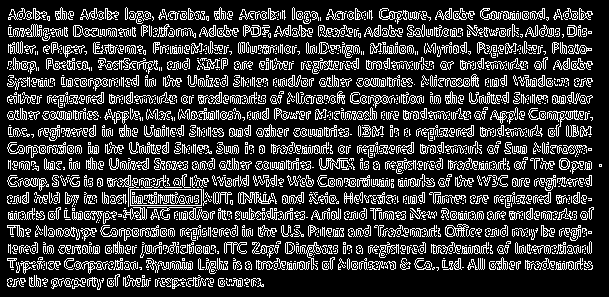

In [43]:
#canny edge detection is used to detect the edges int he image
def canny(image):
  return cv2.Canny(image,100,200)
canny = canny(gray)
Image.fromarray(canny)

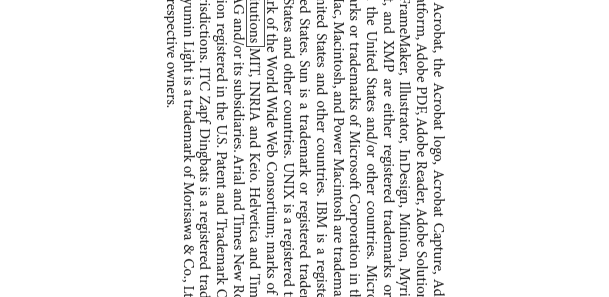

In [46]:
#skew correction....deskew process is a process whereby skew is remvoed by rotating an img by the same amt as its skew but int he opp direction so due to which it results in a horizaontally and vertically aligned image where the text runs across the page rather thamn at an angle
def deskew(image):
  coords =np.column_stack(np.where(image>0))
  angle=cv2.minAreaRect(coords)[-1]
  if angle < -45:
    angle = -(90+angle)
  else:
    angle =-angle
    (h,w)=image.shape[:2]
    center =(w//2,h//2)#dividing the width and height by 2
    M=cv2.getRotationMatrix2D(center,angle,1.0)
    rotated =cv2.warpAffine(image,M,(w,h),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated
rotated =deskew(gray)
Image.fromarray(rotated)

In [48]:
#template matching
def match_template(image,template):
  return cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)
match = match_template(gray,gray)
match

array([[1.]], dtype=float32)

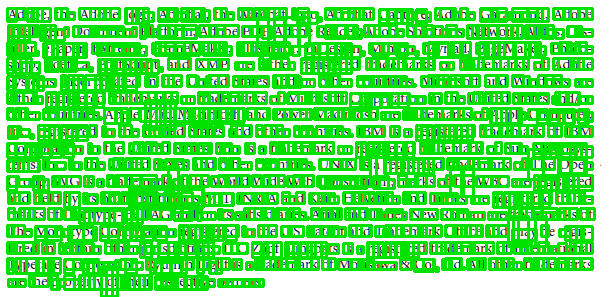

In [51]:
#drawing a rectangle around the text
img =cv2.imread('sample.png')
h,w,c =img.shape
boxes= pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
  b=b.split(' ')
  img = cv2.rectangle(img,(int(b[1]),h-int(b[2])),(int(b[3]),h-int(b[4])),(0,225,0),2)
Image.fromarray(img)

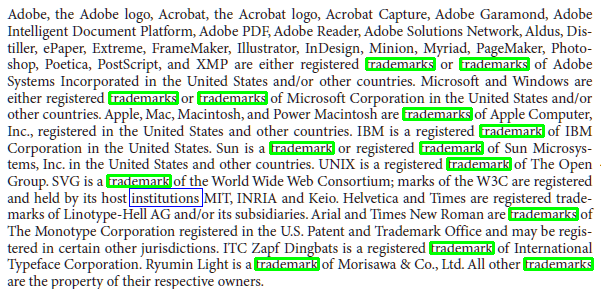

In [55]:
#drawing pattern on specific pattern or word

img=cv2.imread('sample.png')
d= pytesseract.image_to_data(img,output_type=Output.DICT)
keys = list(d.keys())

date_pattern ='trademark'#it will draw rectangle around this word
n_boxes = len(d['text'])

for i in range(n_boxes):
  if int(d['conf'][i])>60:
    if re.match(date_pattern,d['text'][i]):
      (x,y,w,h)=(d['left'][i],d['top'][i],d['width'][i],d['height'][i])
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
Image.fromarray(img)